<a href="https://colab.research.google.com/github/YvesFelipe/ChurnMVP/blob/main/MVP_YVES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP da Sprint de Qualidade de Software,Segurança e Sistemas Inteligentes
## Dataset de Rotatividade de clientes

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset de rotatividade

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/YvesFelipe/Dataset/main/churn-dataset.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Age,Gender,Tenure,UsageFrequency,SupportCalls,PaymentDelay,SubscriptionType,ContractLength,TotalSpend,LastInteraction,Churn
0,22,1,25,14,4,27,1,1,598,9,1
1,41,1,28,28,7,13,2,1,584,20,0
2,47,2,27,10,2,29,3,3,757,21,0
3,35,2,9,12,5,17,3,2,232,18,0
4,53,1,58,24,9,2,2,3,533,18,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:10]
y = array[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.809608 (0.003971)
CART: 0.998369 (0.000603)
NB: 0.839570 (0.003988)
SVM: 0.816559 (0.005617)


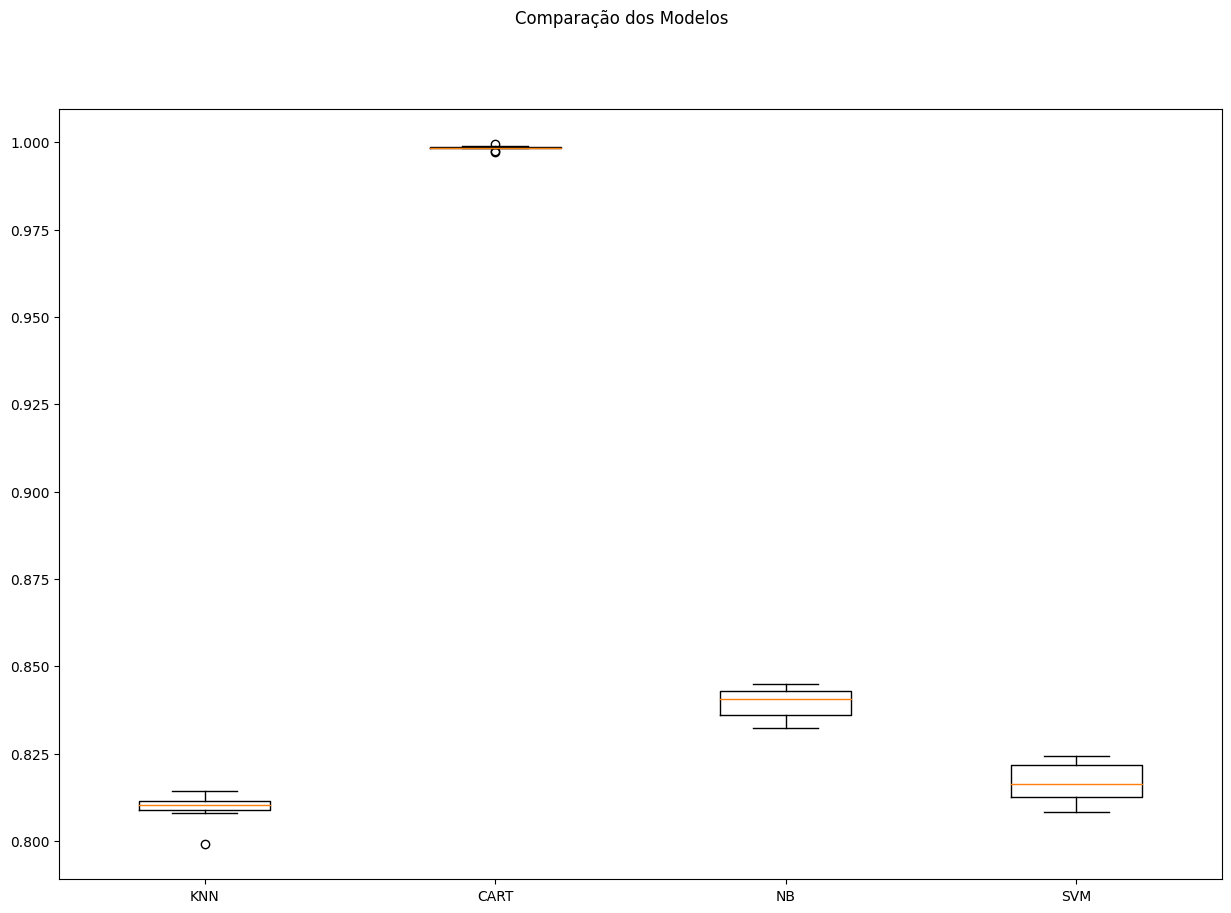

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.810 (0.004)
CART-orig: 0.998 (0.001)
NB-orig: 0.840 (0.004)
SVM-orig: 0.817 (0.006)
KNN-padr: 0.909 (0.004)
CART-padr: 0.998 (0.001)
NB-padr: 0.840 (0.004)
SVM-padr: 0.943 (0.002)
KNN-norm: 0.908 (0.004)
CART-norm: 0.998 (0.001)
NB-norm: 0.840 (0.004)
SVM-norm: 0.937 (0.001)


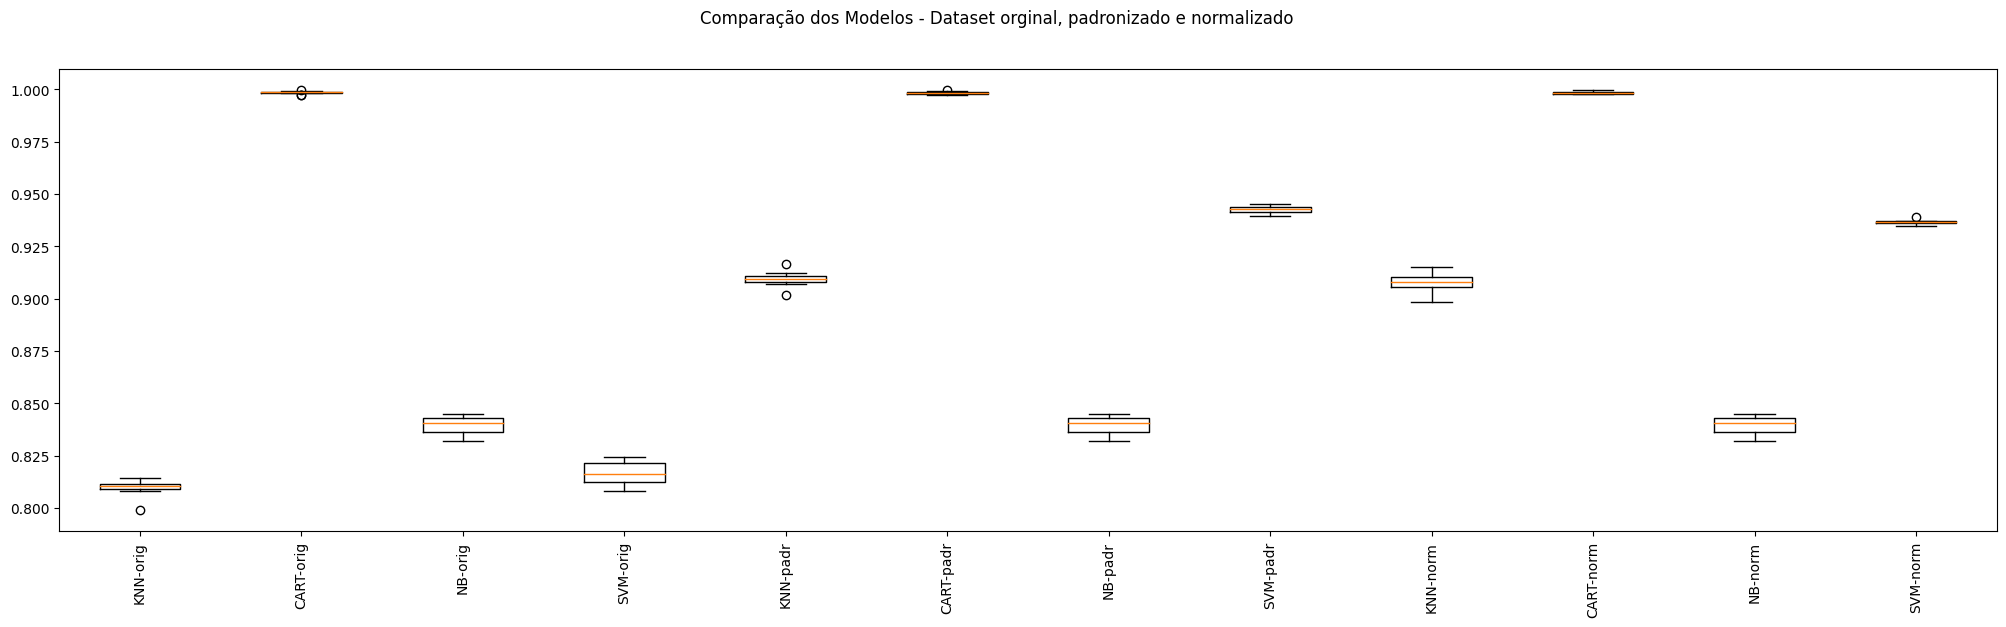

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do CART

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = {
    'CART__criterion': ["gini", "entropy", "log_loss"],
    'CART__splitter':["random", "best"],
    'CART__min_samples_leaf': [1, 2, 3 ,4, 5],
    'CART__min_samples_split': [1, 2, 3, 4, 5],
    'CART__random_state': [0]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: cart-orig - Melhor: 0.998718 usando {'CART__criterion': 'entropy', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2, 'CART__random_state': 0, 'CART__splitter': 'best'}
Sem tratamento de missings: cart-padr - Melhor: 0.998699 usando {'CART__criterion': 'entropy', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2, 'CART__random_state': 0, 'CART__splitter': 'best'}
Sem tratamento de missings: cart-norm - Melhor: 0.998757 usando {'CART__criterion': 'entropy', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 4, 'CART__random_state': 0, 'CART__splitter': 'best'}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
#scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
#rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, random_state=0, splitter= 'best')
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
#rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9990679611650486


In [ ]:
# Preparação do modelo com TODO o dataset
#scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
#rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(X, y)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'Age':  [22, 41, 47],
        'Gender': [1, 1, 2],
        'Tenure': [25, 28, 127],
        'UsageFrequency': [14, 28, 10],
        'SupportCalls': [4, 7, 2],
        'PaymentDelay': [27, 13, 29],
        'SubscriptionType': [1, 2, 3],
        'ContractLength': [1, 1, 3],
        'TotalSpend' : [598, 584, 757],
        'LastInteraction' : [9, 20, 21],
        }

atributos = ['Age', 'Gender', 'Tenure', 'UsageFrequency', 'SupportCalls', 'PaymentDelay', 'SubscriptionType', 'ContractLength', 'TotalSpend', 'LastInteraction']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:10].astype(int)

# Padronização nos dados de entrada usando o scaler utilizado em X
#rescaledEntradaX = scaler.transform(X_entrada)
print(X_entrada)

[[ 22   1  25  14   4  27   1   1 598   9]
 [ 41   1  28  28   7  13   2   1 584  20]
 [ 47   2 127  10   2  29   3   3 757  21]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(X_entrada)
print(saidas)

[1 0 0]


In [ ]:
# Salvando o modelo treinado em um arquivo
import pickle
pickle_out = open('classificadorNovo.pkl','wb')
pickle.dump(model, pickle_out)
pickle_out.close()

  Os dados utilizados foram retirados de uma tabela de clientes com informações sobre suas assinaturas e interações com a empresa com a finalidade de na ultimar coluna saber se o cliente rotacionou no final da assinatura ou se continuou usando o serviço oferecido.
  O primeiro passo realizado foi a divisão dos dados que continham um total de mais de 60 mil linhas em 20% guardadas para teste do modelo e os 80% restante para o treinamento do mesmo. Por ter uma quantidade grande de linhas todos os modelos de previsão retornaram uma acurácia elevada, sendo o pior deles o KNN com uma acurácia de 80% e o melhor a Árvore de decisão com 99,83%.
  Após esse teste inicial foi feito um teste com base também nos dados sendo normalizados e padronizados e após as comparações a DT continuou sendo disparadamente a melhor opção, com tanto a padronização quanto a normalização dando o mesmo resultado dos dados originais.
  Depois de confirmada a escolha da Árvore de decisão foi feito uma otimização dos parâmetros para que o resultado pudesse ser melhorado. A escolha acabou sendo pelos dados originais pois mesmo após a otimização, a diferença continuou muito pequena e a facilidade de entrada de dados para os originais fortaleceu a escolha.